In [43]:
from pylab import *
from matplotlib import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as pyplot
import numpy as np
import math

19.75

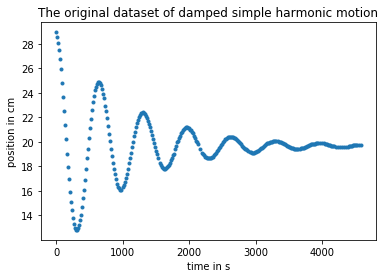

In [208]:
#Load datapoints
w = np.loadtxt("dampshm.txt", delimiter=",");
position = w[:,0] # channel
times = w[:,1] # counts

plot(times,position,'.')

pyplot.title('The original dataset of damped simple harmonic motion')
pyplot.xlabel('time in s')
pyplot.ylabel('position in cm')
position[286]

In [209]:
zeroing = mean(position);
print(zeroing)

19.7697212543554


Text(0, 0.5, 'position in cm')

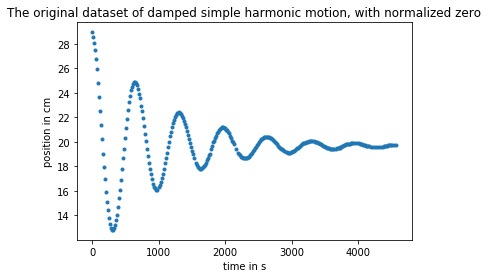

In [210]:
#position = position - zeroing;
plot(times,position,'.')

pyplot.title('The original dataset of damped simple harmonic motion, with normalized zero')
pyplot.xlabel('time in s')
pyplot.ylabel('position in cm')

Text(0, 0.5, 'position in cm')

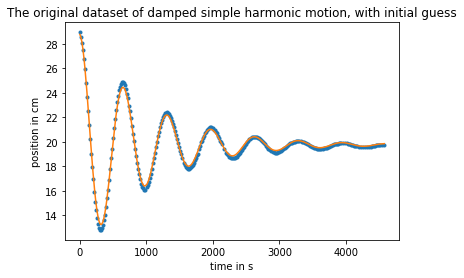

In [211]:
#Define function
def myfitfn(t,A,b,f,theta,zero):
    return A*exp(-b*t)*cos(2*(math.pi)*f*t+theta)+zero

A = 9;
b = 0.001;
f = 0.00152;
theta = 0;
zero = zeroing;
y = A*exp(-b*times)*np.cos(2*math.pi*f*times+theta)+zero;

plot(times,position,'.')
plot(times,y)
pyplot.title('The original dataset of damped simple harmonic motion, with initial guess')
pyplot.xlabel('time in s')
pyplot.ylabel('position in cm')

[9.36459806e+00 9.54820752e-04 1.51399775e-03 9.11607726e-02
 1.97318173e+01]
[[ 3.17576541e-04  3.25829629e-08 -1.11974317e-09  7.05167354e-06
   5.22907815e-07]
 [ 3.25829629e-08  6.80873819e-12 -1.21346118e-13  7.35993488e-10
   6.18845809e-11]
 [-1.11974317e-09 -1.21346118e-13  1.84573209e-13 -6.20234418e-10
  -1.72870508e-10]
 [ 7.05167354e-06  7.35993488e-10 -6.20234418e-10  3.95064893e-06
   9.62683034e-07]
 [ 5.22907815e-07  6.18845809e-11 -1.72870508e-10  9.62683034e-07
   9.97436380e-06]]
[1.78206773e-02 2.60935590e-06 4.29619843e-07 1.98762394e-03
 3.15822162e-03]


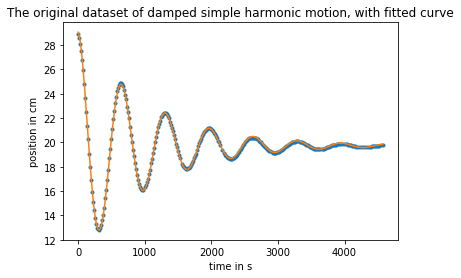

In [207]:
pguess = [A,b,f,theta,zero];
sy = repeat(0.1,len(position))
p,cov = curve_fit(myfitfn,times,position,sigma=sy,p0=pguess);
yfit = p[0]*exp(-p[1]*times)*np.cos(2*math.pi*p[2]*times+p[3])+p[4];

plot(times,position,'.')
plot(times,yfit)
pyplot.title('The original dataset of damped simple harmonic motion, with fitted curve')
pyplot.xlabel('time in s')
pyplot.ylabel('position in cm')

print(p)
print(cov)
error = sqrt(np.diagonal(cov, offset=0, axis1=0, axis2=1))
print(error)

In [219]:
ydif = yfit - position;
sesquare = 0.1**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydif) - 2;
normchi = chi / DOF;
print(normchi)
print(chi)
print(DOF)
print(sum(ydif**2))

0.27630152372946787
78.74593426289834
285
0.7874593426289836
